In [1]:
#import need packages

import numpy as np
import random
import tensorflow as tf


In [2]:
# create train data
np.random.seed(3)
train_data = np.random.randn(1000, 8,4)
train_label = (np.absolute(train_data)).astype(int).max(axis = 1)
print(train_label.shape)
dev_data = np.random.randn(10,8,4)
dev_label = np.absolute(dev_data.copy()).astype(int).max(axis = 1)


(1000, 4)


In [3]:
print("train set input")
print(train_data[:10])
print("train set label")
print(train_label[:10])
print("dev set")
print(dev_data[:10])
print("dev set label")
print(dev_label[:10])

train set input
[[[  1.78862847e+00   4.36509851e-01   9.64974681e-02  -1.86349270e+00]
  [ -2.77388203e-01  -3.54758979e-01  -8.27414815e-02  -6.27000677e-01]
  [ -4.38181690e-02  -4.77218030e-01  -1.31386475e+00   8.84622380e-01]
  [  8.81318042e-01   1.70957306e+00   5.00336422e-02  -4.04677415e-01]
  [ -5.45359948e-01  -1.54647732e+00   9.82367434e-01  -1.10106763e+00]
  [ -1.18504653e+00  -2.05649899e-01   1.48614836e+00   2.36716267e-01]
  [ -1.02378514e+00  -7.12993200e-01   6.25244966e-01  -1.60513363e-01]
  [ -7.68836350e-01  -2.30030722e-01   7.45056266e-01   1.97611078e+00]]

 [[ -1.24412333e+00  -6.26416911e-01  -8.03766095e-01  -2.41908317e+00]
  [ -9.23792022e-01  -1.02387576e+00   1.12397796e+00  -1.31914233e-01]
  [ -1.62328545e+00   6.46675452e-01  -3.56270759e-01  -1.74314104e+00]
  [ -5.96649642e-01  -5.88594380e-01  -8.73882298e-01   2.97138154e-02]
  [ -2.24825777e+00  -2.67761865e-01   1.01318344e+00   8.52797841e-01]
  [  1.10818750e+00   1.11939066e+00   1.48754

# Building NN Model

In [4]:
def model(w, b, kind, width, height):
    #1 layer hidden unit
    x = tf.placeholder(tf.float32, [None, width * height])
    x_image = tf.reshape(x, shape=[-1, height, width, 1])
    y_ = tf.placeholder(tf.float32, [None, kind])
    keep_prob = tf.placeholder(tf.float32)
    w_alpha = 0.00001
    b_alpha = 0.0001
    layers_dims = [1, 32]
    L = len(layers_dims)
    
    input_layer_data = tf.reshape(x_image, [-1, height, width, 1])
    new_width, new_height = width, height
    for l in range(1,L):
        input_layer_data = tf.reshape(input_layer_data, [-1, height, width, 1])
        w = tf.Variable(w_alpha*tf.random_normal([3, 3, layers_dims[l-1], layers_dims[l]])) 
        b = tf.Variable(b_alpha*tf.random_normal([layers_dims[l]]))
        conv = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(input_layer_data, w, strides=[1, 1, 1, 1], padding='SAME'), b))
        conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        conv = tf.nn.dropout(conv, keep_prob)
        input_layer_data = conv
        new_width = int(new_width / 2)
        new_height = int(new_height / 2) 

        
    w_d = tf.Variable(w_alpha*tf.random_normal([int(new_width * new_height * layers_dims[l]), 256]))
    b_d = tf.Variable(b_alpha*tf.random_normal([256]))
    dense = tf.reshape(conv, [-1, w_d.get_shape().as_list()[0]])
    dense = tf.nn.relu(tf.add(tf.matmul(dense, w_d), b_d))
    dense = tf.nn.dropout(dense, keep_prob)

    w_out1 = tf.Variable(w_alpha*tf.random_normal([256, 1]))
    b_out1 = tf.Variable(b_alpha*tf.random_normal([1]))
    w_out2 = tf.Variable(w_alpha*tf.random_normal([256, 1]))
    b_out2 = tf.Variable(b_alpha*tf.random_normal([1]))
    w_out3 = tf.Variable(w_alpha*tf.random_normal([256, 1]))
    b_out3 = tf.Variable(b_alpha*tf.random_normal([1]))
    w_out4 = tf.Variable(w_alpha*tf.random_normal([256, 1]))
    b_out4 = tf.Variable(b_alpha*tf.random_normal([1]))

    y_conv1 = tf.add(tf.matmul(dense, w_out1), b_out1)    
    y_conv2 = tf.add(tf.matmul(dense, w_out2), b_out2)    
    y_conv3 = tf.add(tf.matmul(dense, w_out3), b_out3)    
    y_conv4 = tf.add(tf.matmul(dense, w_out4), b_out4)
    out = tf.concat([y_conv1, y_conv2, y_conv3, y_conv3],1, name="out")
    return x, keep_prob, y_, out

In [5]:

width = train_data.shape[2]
height = train_data.shape[1]
train_input_data = train_data.reshape((train_data.shape[0], train_data.shape[1]*train_data.shape[2]))
dev_input_data = dev_data.reshape((dev_data.shape[0], dev_data.shape[1]*dev_data.shape[2]))
x, keep_prob, y_, out = model(0.001, 0.001, 4, width, height)

#loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = y_group, labels=y_))
with tf.name_scope('CrossEntropy'):
    loss = tf.reduce_mean(tf.pow((out - y_),2))
    #loss = tf.reduce_mean(tf.pow(out - y_))

lost_wist = tf.summary.scalar("Loss", loss)
    
with tf.name_scope('GradientDescent'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0005).minimize(loss)
#get closest int
out_rint = tf.cast(tf.rint(out), tf.int64)
with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.cast(y_, tf.int64), out_rint)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_wist = tf.summary.scalar('Accuracy', accuracy)

print("start")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    summary = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('logs/train/',  sess.graph)
    dev_writer = tf.summary.FileWriter('logs/dev/',  sess.graph)
    
    try :
        for i in range(100000) :
            _, loss_ = sess.run([optimizer, loss], feed_dict={ x: train_input_data, y_: train_label, keep_prob: 0.5}) 

            if(i % 300 == 0) :
                train_summary, train_accuracy_result, train_loss = sess.run([summary, accuracy, loss] , feed_dict={ x: train_input_data , y_: train_label , keep_prob: 1})
                dev_summary, dev_accuracy_result, dev_loss = sess.run([summary, accuracy, loss] , feed_dict={ x: dev_input_data , y_: dev_label , keep_prob: 1}) 
                train_writer.add_summary(train_summary, i)
                train_writer.flush()
                dev_writer.add_summary(dev_summary, i)
                dev_writer.flush()
                print("step - "+ str(i), " train loss is ", train_loss)
                print("train accuracy", train_accuracy_result)
                print("dev accuracy", dev_accuracy_result)
    except KeyboardInterrupt :
        train_writer.close()
        dev_writer.close()
        sess.close()
    train_writer.close()
    dev_writer.close()

start
step - 0  train loss is  1.95617
train accuracy 0.05225
dev accuracy 0.025
step - 300  train loss is  0.300245
train accuracy 0.66075
dev accuracy 0.625
step - 600  train loss is  0.278497
train accuracy 0.68025
dev accuracy 0.625
step - 900  train loss is  0.266732
train accuracy 0.68975
dev accuracy 0.625
step - 1200  train loss is  0.257416
train accuracy 0.6935
dev accuracy 0.6
step - 1500  train loss is  0.244976
train accuracy 0.70625
dev accuracy 0.6
step - 1800  train loss is  0.221813
train accuracy 0.72825
dev accuracy 0.625
step - 2100  train loss is  0.20511
train accuracy 0.74575
dev accuracy 0.625
step - 2400  train loss is  0.19119
train accuracy 0.76275
dev accuracy 0.6
step - 2700  train loss is  0.183068
train accuracy 0.7705
dev accuracy 0.6
step - 3000  train loss is  0.177426
train accuracy 0.7715
dev accuracy 0.625
step - 3300  train loss is  0.172681
train accuracy 0.78
dev accuracy 0.625


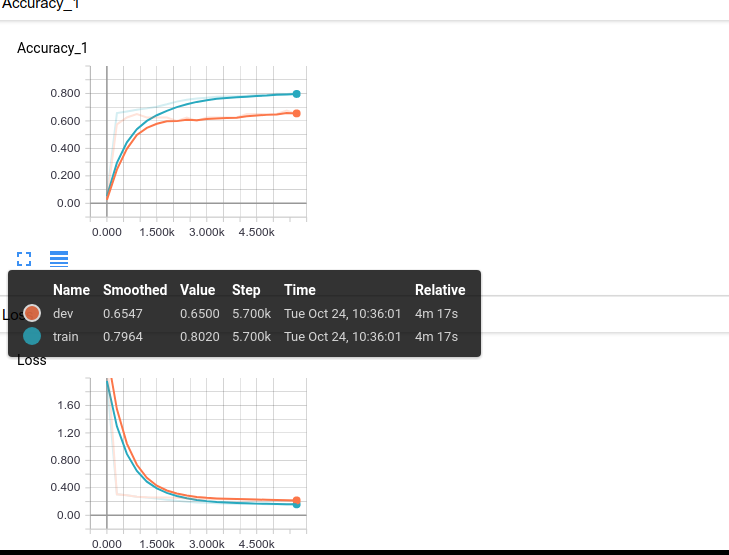